In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = sns.load_dataset("iris")

## QQ PLOT

<Axes: xlabel='sepal_length', ylabel='Density'>

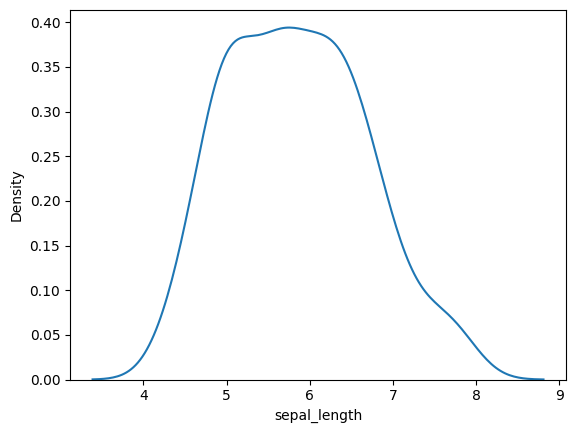

In [3]:
sns.kdeplot(df['sepal_length'])

##### *`Step 1`: Sorting all the values of Y (sepal length)*

In [4]:
temp = sorted(df['sepal_length'].tolist())

##### *`Step 2`: Calculating percentiles (100 quantiles) of the sorted Y*

In [12]:
y_quant = []           

for i in range(1,101):
    y_quant.append(np.percentile(temp,i))

##### *`Step 3`: Generating a theoretical data (normally distributed)*

In [7]:
samples = np.random.normal(loc = 0, scale = 1, size = 1000)

##### *`Step 4`: Calculating 100 quantiles (percentile) of the theoretical data*

In [11]:
x_quant = []

for i in range(1,101):
    x_quant.append(np.percentile(samples,i))

##### *`Step 5`: Plotting the scatterplot*

<Axes: >

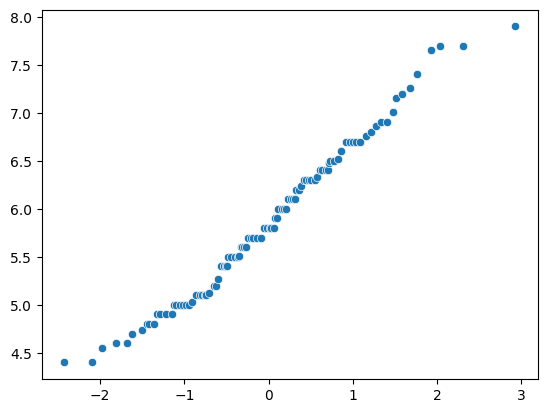

In [13]:
sns.scatterplot(x = x_quant, y = y_quant)

## Alternate way : statsmodel

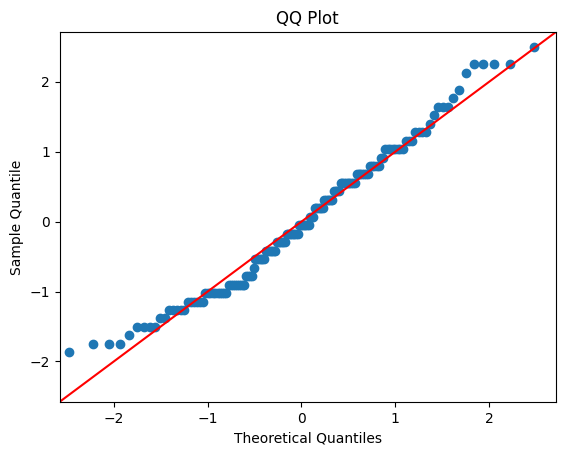

In [18]:
fig = sm.qqplot(df['sepal_length'], line = '45', fit = True)

plt.title("QQ Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantile")

plt.show()

![Interpretion](https://miro.medium.com/v2/resize:fit:1024/0*i0IBOX7POkxv6xre.jpeg)

![thin tail](https://miro.medium.com/v2/resize:fit:1400/1*YtidhzyY8VtL4-QE9ce3QQ.png)


![fat tails](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSiITDKTdfa4IQnDc6qNVSGiuGjC3deyyhDaP_3yKz3Lu_ieys7fs7lpHewwWNMfXQLBJI&usqp=CAU)

## Detecting another distribution using QQ Plot

##### *`Step 1`: Generating a random data*

In [20]:
x = np.random.uniform(low = 0, high = 1, size = 1000)

(array([ 91., 118., 101., 106.,  89.,  92., 105.,  89., 108., 101.]),
 array([1.14854563e-05, 9.98209716e-02, 1.99630458e-01, 2.99439944e-01,
        3.99249430e-01, 4.99058916e-01, 5.98868403e-01, 6.98677889e-01,
        7.98487375e-01, 8.98296861e-01, 9.98106347e-01]),
 <BarContainer object of 10 artists>)

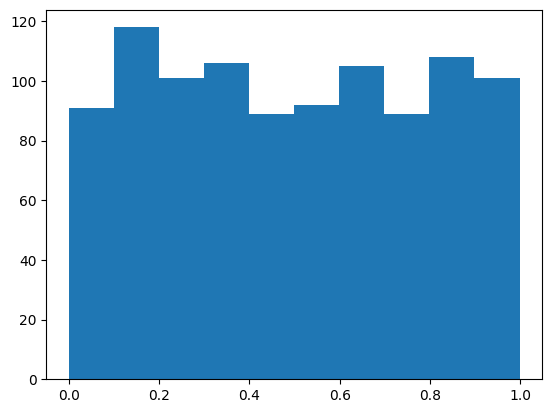

In [21]:
plt.hist(x)

##### *`Step 2`:  Fitting a uniform distribution instead of normal*

In [25]:
params = stats.uniform.fit(x)   #used to fit a uniform distribution to the data provided in the array x
dist = stats.uniform(loc = params[0], scale = params[1])

In [24]:
params
#loc (a) = lower bound of the uniform distribution
#scale (b)= upper bound 

(1.1485456277715578e-05, 0.9980948618238602)

*Note: `dist` parameter specifies the comparison distribution. The default is scipy.stats.distributions.norm (a standard normal).*

##### *`Step 3`: Plot the QQ Plot*

Text(0, 0.5, 'Sample Quantiles')

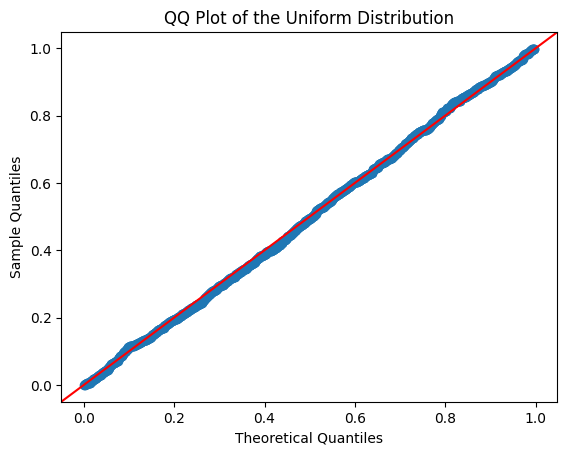

In [26]:
fig = sm.qqplot(x , dist = dist, line ='45')

plt.title("QQ Plot of the Uniform Distribution")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")